SUMMER INTERNSHIP IIT KHARAGPUR 2022

Objective: Building a network intrusion detection system

In [262]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [263]:
#Adding columns to the dataset
col_names="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

#Appending new column to the dataset
columns=[]
for c in col_names.split(','):
    if(c.strip()):
        columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [264]:
#Reading the attack type files
with open("attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


In [265]:
#Creating a dictionary of attack types
attack_types={
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}

In [266]:
#Reading the dataset and adding the attack type feature, which has five distinct values (dos, normal, probing, r2l, u2r) to the training dataset.

df=pd.read_excel("kddcup_10_percent_rectified.xlsx", names=columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [267]:
df['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [268]:
#Adding the attack_types column
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])
df['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [269]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [270]:
df.shape

(494020, 43)

In [271]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [272]:
attack_types={
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}
df["Attack Type"]=df.target.apply(lambda x: attack_types[x[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


Data Preprocessing

In [273]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [274]:
#Handling missing values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [275]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [276]:
#Identifying categorical features
categorical_columns=list(df.select_dtypes(include='object').columns)
categorical_columns

['protocol_type', 'service', 'flag', 'target', 'Attack Type']

In [277]:
#Remove the target and attack_type column
categorical_columns.remove('target')
categorical_columns.remove('Attack Type')
categorical_columns

['protocol_type', 'service', 'flag']

Categorical features distribution

In [278]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind='bar',color='g')
    plt.grid()

Text(0.5, 1.0, 'Flag')

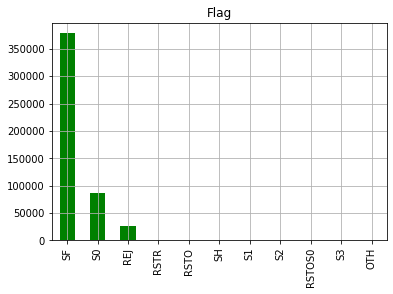

In [279]:
bar_graph('flag')
plt.title("Flag")

Text(0.5, 1.0, 'Service')

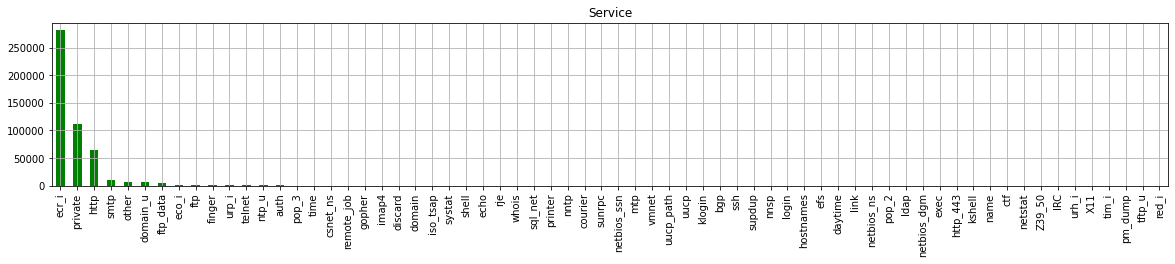

In [280]:
plt.figure(figsize=(20,3))
bar_graph('service')
plt.title("Service")

Text(0.5, 1.0, 'Protocol Type')

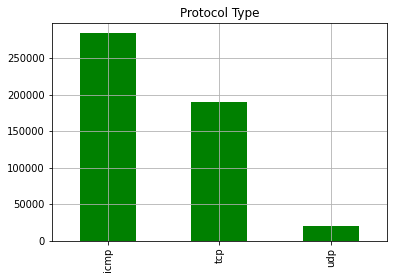

In [281]:
bar_graph('protocol_type')
plt.title("Protocol Type")

Visualizing Target and Attack Type columns

Text(0.5, 1.0, 'Target')

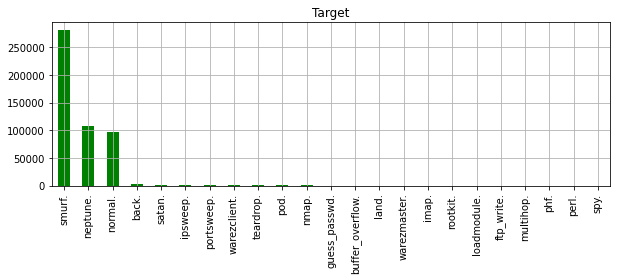

In [282]:
plt.figure(figsize=(10,3))
bar_graph('target')
plt.title("Target")

Text(0.5, 1.0, 'Attack Type')

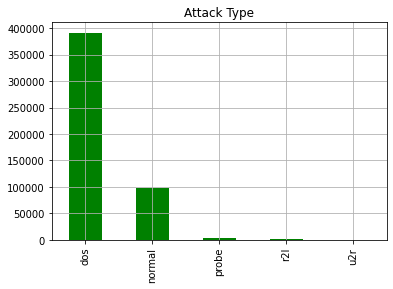

In [283]:
bar_graph('Attack Type')
plt.title("Attack Type")

We need to predict that whether a connection is a normal connection or an intrusion

Data Correlation

Identify the highly correlated features and eliminate them

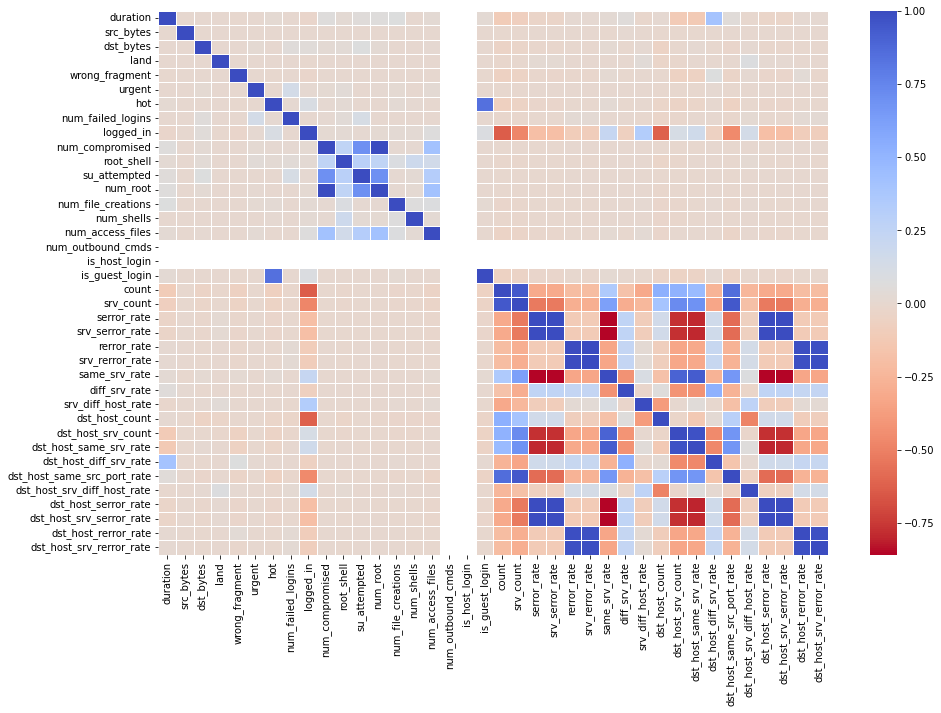

In [284]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,linewidths=0.5,cmap='coolwarm_r')
plt.show()

In [285]:
df.num_outbound_cmds.unique()

array([0], dtype=int64)

In [286]:
df.is_host_login.unique()

array([0], dtype=int64)

In [287]:
df['num_root'].corr(df['num_compromised'])

0.9938277978733938

In [288]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615065593687

In [289]:
df['srv_count'].corr(df['count'])

0.9436669953129888

In [290]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309533247114

In [291]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736906960847694

In [292]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559165358191

In [293]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038351835864

In [294]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278079908913704

In [295]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989593789529922

In [296]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449262532055139

In [297]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729674316566

In [298]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978352994315264

In [299]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849247632945

In [300]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041088827093

In [301]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994790866997

In [302]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663404802504

In [303]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.985199552224188

In [304]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705421991927

In [305]:
df.drop('num_root',axis=1,inplace=True)

df.drop('srv_serror_rate',axis=1,inplace=True)

df.drop('srv_rerror_rate',axis=1,inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [306]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,normal


In [307]:
df.shape

(494020, 35)

In [308]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

Feature Mapping

In [309]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

In [310]:
protocol_map={'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type']=df['protocol_type'].map(protocol_map)

In [311]:
df['flag'].value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [312]:
flag_map={'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag']=df['flag'].map(flag_map)

In [313]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
1,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
2,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,normal


In [314]:
df.shape

(494020, 35)

In [315]:
df.drop('service',axis=1,inplace=True)
df.drop('num_outbound_cmds',axis=1,inplace=True)
df.drop('is_host_login',axis=1,inplace=True)

In [316]:
df.shape

(494020, 32)

In [317]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [318]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
1,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
2,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
3,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,normal


In [319]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

Modelling

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [321]:
df=df.drop(['target'],axis=1)
print(df.shape)

(494020, 31)


In [322]:
Y=df[['Attack Type']]
X=df.drop(['Attack Type'],axis=1)

scale=MinMaxScaler()
X=scale.fit_transform(X)

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330993, 30) (163027, 30)
(330993, 1) (163027, 1)


Decision Tree

In [323]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
full_tree=DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [325]:
max_depth=full_tree.get_depth()
max_depth

29

In [326]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    'max_depth':[i for i in range(1,max_depth+1)],
    'splitter':['best','random']
})

clf.fit(X_train,Y_train.values.flatten())
clf.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'splitter': 'random'}

In [327]:
clf.best_score_

0.999462223874996

In [332]:
Decision_Tree_model=DecisionTreeClassifier(criterion='entropy',max_depth=17,splitter='random')

start_time=time.time()
Decision_Tree_model.fit(X_train,Y_train.values.flatten())
end_time=time.time()
print("Training time: ",end_time-start_time)

start_time=time.time()
dec_tree_prediction=Decision_Tree_model.predict(X_test)
end_time=time.time()
print("Testing time: ",end_time-start_time)

print("Training score = ",Decision_Tree_model.score(X_train,Y_train))
print("Testing score = ",Decision_Tree_model.score(X_test,Y_test))

Training time:  3.204875946044922
Testing time:  0.06033802032470703
Training score =  0.999743196986039
Testing score =  0.9994111404859318


<AxesSubplot:>

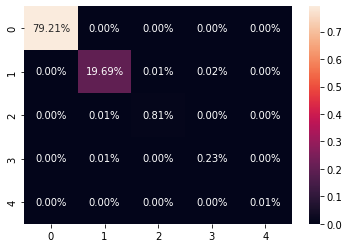

In [335]:
cf_matrix = confusion_matrix(Y_test,dec_tree_prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

Random Forest

In [337]:
from sklearn.ensemble import RandomForestClassifier

In [338]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(RandomForestClassifier(),{
    'criterion':['gini','entropy'],
    'bootstrap':[True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
})

clf.fit(X_train,Y_train.values.flatten())
clf.best_params_

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20}

In [339]:
clf.best_score_

0.999688815089151

In [340]:
Random_Forest_model=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30)

start_time=time.time()
Random_Forest_model.fit(X_train,Y_train.values.flatten())
end_time=time.time()
print("Training time: ",end_time-start_time)

start_time=time.time()
random_Forest_prediction=Random_Forest_model.predict(X_test)
end_time=time.time()
print("Testing time: ",end_time-start_time)

print("Training score = ",Random_Forest_model.score(X_train,Y_train))
print("Testing score = ",Random_Forest_model.score(X_test,Y_test))

Training time:  23.30068874359131
Testing time:  1.5152175426483154
Training score =  0.9999848939403553
Testing score =  0.9997730437289529


<AxesSubplot:>

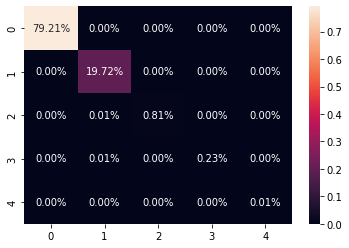

In [341]:
cf_matrix = confusion_matrix(Y_test,random_Forest_prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

Gaussian Naive Bayes

In [342]:
from sklearn.naive_bayes import GaussianNB

Gaussian_model=GaussianNB()

start_time=time.time()
Gaussian_model.fit(X_train,Y_train.values.flatten())
end_time=time.time()
print("Training time: ",end_time-start_time)

start_time=time.time()
Gaussian_prediction=Gaussian_model.predict(X_test)
end_time=time.time()
print("Testing time: ",end_time-start_time)

print("Training score = ",Gaussian_model.score(X_train,Y_train))
print("Testing score = ",Gaussian_model.score(X_test,Y_test))

Training time:  0.5115134716033936
Testing time:  0.25363659858703613
Training score =  0.8778584441362808
Testing score =  0.8780079373355334


<AxesSubplot:>

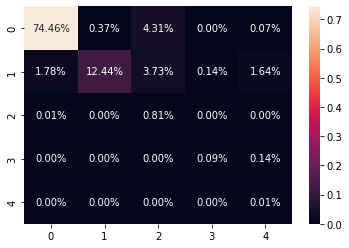

In [343]:
cf_matrix = confusion_matrix(Y_test,Gaussian_prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

Support Vector Machine

In [344]:
from sklearn.svm import SVC

SVM_Model=SVC(gamma='scale', kernel='rbf')

start_time=time.time()
SVM_Model.fit(X_train, Y_train.values.flatten())
end_time=time.time()
print("Training time: ",end_time-start_time)

start_time = time.time()
SVM_Prediction=SVM_Model.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Training score = ",SVM_Model.score(X_train,Y_train))
print("Testing score = ",SVM_Model.score(X_test,Y_test))

Training time:  517.8903474807739
Testing time:  80.11959719657898
Training score =  0.9987794303807029
Testing score =  0.9987241377195188


<AxesSubplot:>

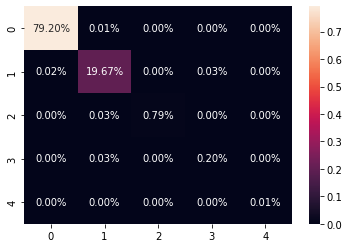

In [346]:
cf_matrix = confusion_matrix(Y_test,SVM_Prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

Visualizing Training and Testing Scores

In [347]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

<BarContainer object of 4 artists>

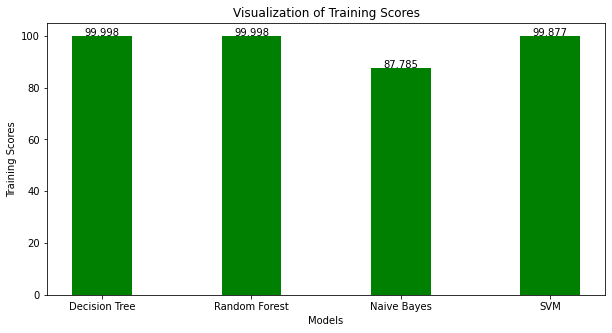

In [348]:
model = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
scores = [99.998, 99.998, 87.785, 99.877]
plt.figure(figsize = (10, 5))
plt.xlabel("Models")
plt.ylabel("Training Scores")
plt.title("Visualization of Training Scores")
addlabels(model, scores)
plt.bar(model, scores, color='green', width=0.4)

<BarContainer object of 4 artists>

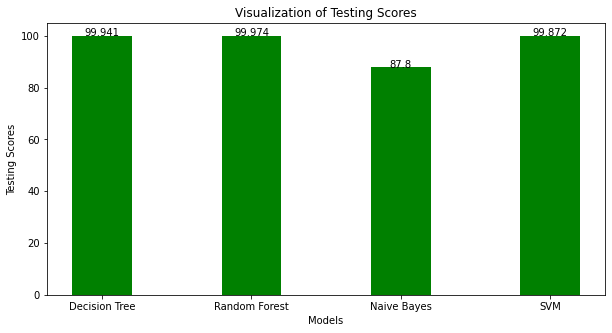

In [349]:
model = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
scores = [99.941, 99.974 , 87.800, 99.872]
plt.figure(figsize = (10, 5))
plt.xlabel("Models")
plt.ylabel("Testing Scores")
plt.title("Visualization of Testing Scores")
addlabels(model, scores)
plt.bar(model, scores, color='green', width=0.4)

Visualizing Training and Testing Time

<BarContainer object of 4 artists>

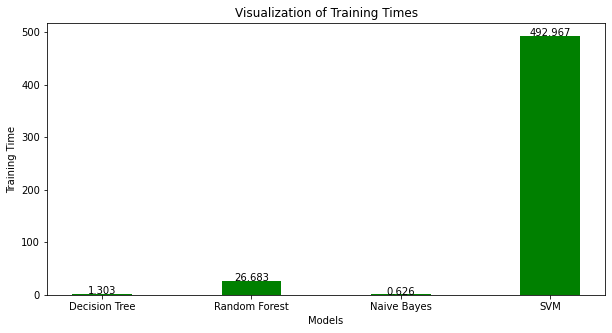

In [350]:
model = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
time_values = [1.303, 26.683, 0.626, 492.967]
plt.figure(figsize = (10, 5))
plt.xlabel("Models")
plt.ylabel("Training Time")
plt.title("Visualization of Training Times")
addlabels(model, time_values)
plt.bar(model, time_values, color='green', width=0.4)

<BarContainer object of 4 artists>

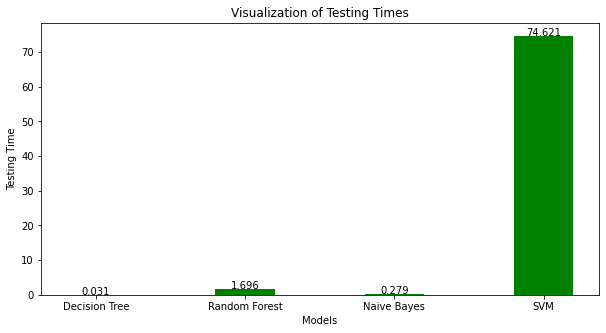

In [351]:
model = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
time_values = [0.031, 1.696, 0.279, 74.621]
plt.figure(figsize = (10, 5))
plt.xlabel("Models")
plt.ylabel("Testing Time")
plt.title("Visualization of Testing Times")
addlabels(model, time_values)
plt.bar(model, time_values, color='green', width=0.4)

Taking into consideration the training and testing time and the training and testing scores we conclude that Decision Tree Algorithm with criterion: 'entropy' , 'max_depth': 17 and splitter: 'random'  gives the best result.